# Breast Cancer Classification Project

In this project, we will be useing k-nearest neighbor (KNN) classification to help making breast cancer diagnosis. The principle of KNN classification is to compute the distance from data entries to classify to all entries in the training dataset, choose the k training data entries that are closest, and classify based on majority vote among the k nearest neighbors.

To make things easier, we will be importing **libraries** such as NumPy. Below are documentations to libraries that we will use. While we will try to make it clear how each function we need from them works, we highly recommend you go and look them up yourself as reading documentations is an important skill in learning coding!

NumPy: https://numpy.org/doc/stable/

Pandas: https://pandas.pydata.org/pandas-docs/stable/

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Step 1: Read data
(We've done this for you, nothing to edit here)

First, we want to read the train and test datasets (.csv files provided with the starter code).
If interested, you can read more about the dataset at [this website]( https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic))
and [this PDF](https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.56.707&rep=rep1&type=pdf) describes how it was created.

The important things to know about the source data format are that the first column contains IDs of entries, the last column contains classifications where 2 means benign and 4 means maligant, and everything in between are values of features.

The `read_csv()` function in pandas reads a csv file into a [dataframe](
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html), and `.to_numpy()` converts it to a NumPy array.

In [32]:
train = pd.read_csv('train_data.csv').to_numpy()
test = pd.read_csv('test_data.csv').to_numpy()

In [33]:
CLASSIFICATION_INDEX = -1
MALIGNANT = 4
BENIGN = 2

Display the arrays below to get a better idea of how they look like! (We only display the first few rows as they are huge)

In [34]:
train[:5]

array([[1002945,       5,       4,       4,       5,       7,      10,
              3,       2,       1,       2],
       [1015425,       3,       1,       1,       1,       2,       2,
              3,       1,       1,       2],
       [1016277,       6,       8,       8,       1,       3,       4,
              3,       7,       1,       2],
       [1017023,       4,       1,       1,       3,       2,       1,
              3,       1,       1,       2],
       [1017122,       8,      10,      10,       8,       7,      10,
              9,       7,       1,       4]])

In [35]:
test[:5]

array([[667204,      7,      8,      7,      6,      4,      3,      8,
             8,      4,      4],
       [673637,      3,      1,      1,      1,      2,      5,      5,
             1,      1,      2],
       [684955,      2,      1,      1,      1,      3,      1,      2,
             1,      1,      2],
       [688033,      1,      1,      1,      1,      2,      1,      1,
             1,      1,      2],
       [691628,      8,      6,      4,     10,     10,      1,      3,
             5,      1,      4]])

### Step 2: Calculate Distance between two data entries
Write a function that accepts two data entries (1-D array) and returns the Euclidean distance between them using the formula $$\sqrt{\sum_i{(a_i - b_i)^2}}$$ where a_i and b_i are the i-th element of a and b respectively.

Remember to discard the first and last elements (ID and classification).

You can create a numpy array by doing `np.array([content of array])` directly. You can also create an array of all zeros by doing `np.zeros(dims)` where `dims` is a tuple containing the shape of the array you want to create.

You may also want to use `np.sqrt(array)` and `np.sum(array)` to sum elements and find squareroots.

In [36]:
def calculateDistance(first, second):
    # TODO: Your code here!
    first = first[1:-1]
    second = second[1:-1]
    squared_differences = np.array([(first[i] - second[i])**2 for i in range(len(first))])
    return(np.sqrt(np.sum(squared_differences)))

Now run the cell below. If you implemented the function correctly, the output should be 
```
11.313708498984761
10.198039027185569 
4.358898943540674 
```

In [37]:
print(calculateDistance(train[0], train[1]))
print(calculateDistance(train[12], train[14]))
print(calculateDistance(train[7], train[29]))

11.313708498984761
10.198039027185569
4.358898943540674


### Step 3: Calculate distances to ALL data entries
Write a function that accepts one data entry and a list of entries (the `train` matrix we have) and returns an NumPy array containing distance from the one entry to all entries in the list of entries.

Note: For this one project, the code can work if you simply access `train` instead of passing it as an argument, but we want the function to be reusable.

In [38]:
def getAllDistances(entry, train_data):
    # TODO: Your code here!
    distances = np.array([calculateDistance(entry, train) for train in train_data])
    return(distances)

Running code below should output the following:
```
[12.56980509 14.62873884  8.         13.92838828  9.32737905 16.79285562
 14.6628783  15.55634919 14.4222051  15.55634919]
[ 9.64365076  3.60555128 12.20655562  5.         18.38477631  5.74456265
  4.69041576  7.          5.19615242  5.        ]
[11.91637529  2.         12.64911064  3.16227766 20.71231518  9.16515139
  1.73205081  4.24264069  2.44948974  2.44948974]
```

In [39]:
print(getAllDistances(test[0], train)[:10])
print(getAllDistances(test[1], train)[:10])
print(getAllDistances(test[2], train)[:10])

[12.56980509 14.62873884  8.         13.92838828  9.32737905 16.79285562
 14.6628783  15.55634919 14.4222051  15.55634919]
[ 9.64365076  3.60555128 12.20655562  5.         18.38477631  5.74456265
  4.69041576  7.          5.19615242  5.        ]
[11.91637529  2.         12.64911064  3.16227766 20.71231518  9.16515139
  1.73205081  4.24264069  2.44948974  2.44948974]


Run the cell below to visualize pairwise distances in the train dataset.

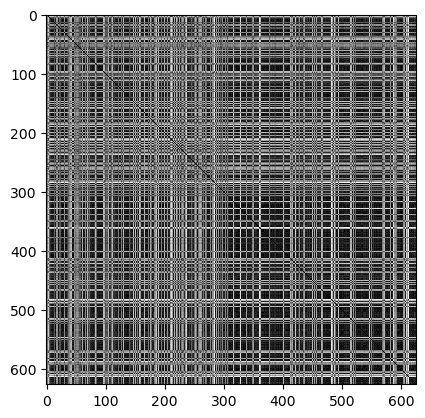

In [40]:
dists = np.array([getAllDistances(train[i], train) for i in range(len(train))])
plt.imshow(dists, cmap='gray', interpolation='nearest')
plt.show()

### Step 4: Find K nearest neighbors
Write a function that accepts a data entry and finds its k nearest neighbors. It should return an array containing indicies of k nearest neighbors (not the distances, nor ID numbers!).

First step would be creating an array `distances` containing the distance from the entry to all other entries. After that, find the k smallest elements in `distances`.

Hint: Use [numpy.argpartition](https://numpy.org/doc/stable/reference/generated/numpy.argpartition.html)

In [41]:
def getKNearestNeighbors(entry, train_data, k):
    # TODO: your code here!
    distances = np.array([calculateDistance(entry, train) for train in train_data])
    return np.argpartition(distances, k)[:k]

Running cell below should output the following:
```
[466 217 226 550 214]
[ 77 242  12  82 113]
[ 88 430  78 535  27]
```

In [42]:
print(getKNearestNeighbors(test[0], train, 5))
print(getKNearestNeighbors(test[1], train, 5))
print(getKNearestNeighbors(test[2], train, 5))

[466 217 226 550 214]
[ 77 242  12  82 113]
[ 88 430  78 535  27]


### Step 5: Classify!
Woohoo! Congrats on making it here! We've done the last bit of work for you. Given the neighbors of an data entry, we count how many of them are benign and malignant, and classify based on that.

In [43]:
def classify(train_data, neighbors_indices):
    num_malignant = 0
    for i in neighbors_indices:
        if train_data[i][CLASSIFICATION_INDEX] == MALIGNANT:
            num_malignant += 1
    if num_malignant > neighbors_indices.size / 2:
        return MALIGNANT
    else:
        return BENIGN

Does your knn classification work on test data?

(Again, we've done this for you. Nothing to edit here)

In [44]:
num_correct = 0
for entry in test:
    neighbors = getKNearestNeighbors(entry, train, 5)
    if classify(train, neighbors) == entry[CLASSIFICATION_INDEX]:
        num_correct += 1
accuracy = num_correct/len(test)
print('Classification accuracy: ' + str(accuracy))

Classification accuracy: 0.9428571428571428
